In [1]:
!pip install yfinance pandas numpy matplotlib seaborn scikit-learn tensorflow requests kaggle joblib


/tmp/ipython-input-8-3056901742.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(TICKER, start=START_DATE, end=END_DATE)
[*********************100%***********************]  1 of 1 completed

Epoch 1/20



/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0079 - val_loss: 8.3904e-04
Epoch 2/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 1.0728e-04 - val_loss: 0.0010
Epoch 3/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 9.5796e-05 - val_loss: 8.7183e-04
Epoch 4/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 9.1827e-05 - val_loss: 8.0218e-04
Epoch 5/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 1.0418e-04 - val_loss: 8.4577e-04
Epoch 6/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 7.8691e-05 - val_loss: 0.0012
Epoch 7/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 8.5957e-05 - val_loss: 0.0010
Epoch 8/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 7.3665e-05 - val_loss: 0.0012
Epoch 9/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 9.6898e-05 - val_loss: 5.2266e-04
Epoch 10/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 6.8657e-05 - val_loss: 4.7975e-04
Epoch 11/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 5.9494e-05 - val_loss: 4.7861e-04
Epoch 

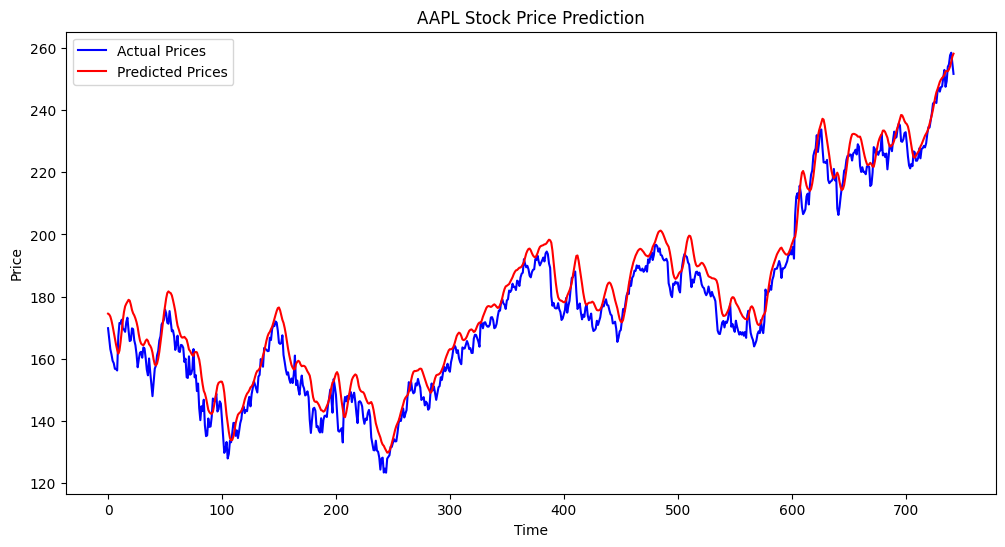

In [8]:
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# --- CONFIG ---
TICKER = 'AAPL'
START_DATE = '2010-01-01'
END_DATE = '2024-12-31'
SEQ_LEN = 60  # Number of days to look back
EPOCHS = 20
BATCH_SIZE = 32

# --- STEP 1: DOWNLOAD DATA ---
df = yf.download(TICKER, start=START_DATE, end=END_DATE)
data = df[['Close']].dropna()

# --- STEP 2: SCALE DATA ---
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# --- STEP 3: CREATE SEQUENCES ---
X = []
y = []

for i in range(SEQ_LEN, len(scaled_data)):
    X.append(scaled_data[i-SEQ_LEN:i, 0])  # past 60 days
    y.append(scaled_data[i, 0])             # next day price

X, y = np.array(X), np.array(y)

# Reshape for LSTM: (samples, time_steps, features)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# --- STEP 4: SPLIT TRAIN & TEST ---
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# --- STEP 5: BUILD THE LSTM MODEL ---
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(SEQ_LEN, 1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

# --- STEP 6: TRAIN THE MODEL ---
history = model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(X_test, y_test))

# --- STEP 7: MAKE PREDICTIONS ---
predicted_prices = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted_prices.reshape(-1, 1))
real_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

# --- STEP 8: PLOT RESULTS ---
plt.figure(figsize=(12,6))
plt.plot(real_prices, color='blue', label='Actual Prices')
plt.plot(predicted_prices, color='red', label='Predicted Prices')
plt.title(f'{TICKER} Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


Enter the stock ticker symbol (e.g., AAPL, MSFT): AAPL
Enter the number of future days to predict: 10


/tmp/ipython-input-2-1166012572.py:13: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start='2010-01-01')
[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Data downloaded: 3911 rows
Price          Close      High       Low      Open     Volume
Ticker          AAPL      AAPL      AAPL      AAPL       AAPL
Date                                                         
2010-01-04  6.431897  6.446623  6.382908  6.414465  493729600
2010-01-05  6.443018  6.479384  6.409056  6.449630  601904800
2010-01-06  6.340533  6.468564  6.333921  6.443018  552160000
2010-01-07  6.328811  6.371488  6.282828  6.363974  477131200
2010-01-08  6.370887  6.371488  6.283129  6.320396  447610800
Training samples: 3080
Testing samples: 771
Starting model training...
Epoch 1/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 10s 71ms/step - loss: 0.0087 - val_loss: 0.0022
Epoch 2/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 9s 56ms/step - loss: 1.0205e-04 - val_loss: 8.8091e-04
Epoch 3/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 5s 60ms/step - loss: 9.3007e-05 - val_loss: 0.0010
Epoch 4/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 11s 65ms/step - loss: 7.6586e-05 - val_loss: 6.0631e-04
Epoch 5/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 9s 55m

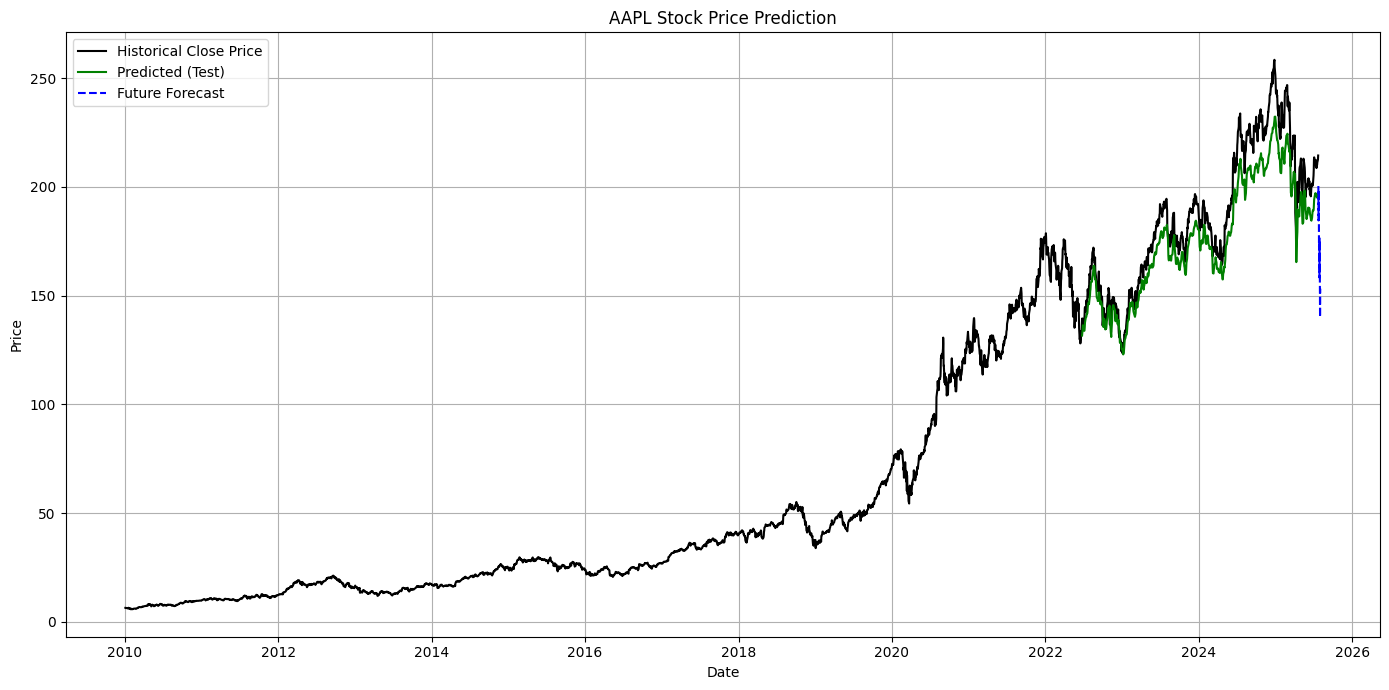

FileNotFoundError: [Errno 2] No such file or directory: 'model/scaler.pkl'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

ticker = input("Enter the stock ticker symbol (e.g., AAPL, MSFT): ").upper().strip()
future_days = int(input("Enter the number of future days to predict: "))
print(f"Downloading {ticker} stock data...")

df = yf.download(ticker, start='2010-01-01')
if df.empty:
    print(f"Error: No data found for ticker '{ticker}'. Please check the symbol and try again.")
    exit()

print(f"Data downloaded: {df.shape[0]} rows")
print(df.head())

FEATURE = 'Close'
data = df[[FEATURE]].values
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

SEQ_LENGTH = 60

def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

X, y = create_sequences(data_scaled, SEQ_LENGTH)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

print(f"Training samples: {len(X_train)}")
print(f"Testing samples: {len(X_test)}")

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(SEQ_LENGTH, 1), activation='relu'))
model.add(LSTM(units=50, return_sequences=False, activation='relu'))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

print("Starting model training...")
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=1)

predicted_scaled = model.predict(X_test)
predicted = scaler.inverse_transform(predicted_scaled)
actual = scaler.inverse_transform(y_test.reshape(-1, 1))
dates = df.index[SEQ_LENGTH + split:]

last_sequence = data_scaled[-SEQ_LENGTH:]
future_scaled = []

recent_preds = model.predict(X_test[-200:], verbose=0).flatten()
volatility = np.std(recent_preds) * 0.8

for _ in range(future_days):
    seq_input = last_sequence.reshape(1, SEQ_LENGTH, 1)
    next_scaled = model.predict(seq_input, verbose=0)[0][0]
    noise = np.random.normal(0, volatility)
    next_scaled_noisy = next_scaled + noise
    next_scaled_noisy = np.clip(next_scaled_noisy, 0, 1)
    future_scaled.append(next_scaled_noisy)
    last_sequence = np.append(last_sequence[1:], [[next_scaled_noisy]], axis=0)

future_predictions = scaler.inverse_transform(np.array(future_scaled).reshape(-1, 1))
all_actual_dates = df.index
future_dates = pd.date_range(start=all_actual_dates[-1] + pd.Timedelta(days=1), periods=future_days)

plt.figure(figsize=(14, 7))
plt.plot(all_actual_dates, df[FEATURE], label="Historical Close Price", color="black")
plt.plot(dates, predicted, label="Predicted (Test)", color="green")
plt.plot(future_dates, future_predictions, label="Future Forecast", color="blue", linestyle="--")
plt.title(f'{ticker} Stock Price Prediction')
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()





In [5]:
import os

# Make sure the model directory exists
os.makedirs("model", exist_ok=True)

# Save scaler and model
joblib.dump(scaler, "model/scaler.pkl")
model.save("model/lstm_model.h5")


In [6]:
from google.colab import files
files.download("model/lstm_model.h5")
files.download("model/scaler.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>